In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2 as cv

## Classes

In [2]:
classes = ["cloth", "KN95","N95", "surgical"]

## Format helper functions

In [3]:
def visualize(img_info, path):
    img_name = path + img_info["ImageID"] + ".jpg"
    bbox = eval(img_info["bbox"])
    img = cv.imread(img_name)
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    [x1, y1, x2, y2] = [int(coord) for coord in bbox]
    cv.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_info["masktype"])
    plt.show()

## Prepare data

In [4]:
train_df = pd.read_csv("data/train.csv")
val_df = pd.read_csv("data/val.csv")

In [5]:
train_df.head()

ImageID                  bbox  masktype
0   k8o0f   [73, 197, 293, 400]       N95
1   7a0l9   [47, 364, 300, 512]  surgical
2   wfp7p  [203, 221, 380, 403]       N95
3   7qaw6   [87, 210, 322, 385]  surgical
4   i4kqj  [227, 283, 479, 475]  surgical

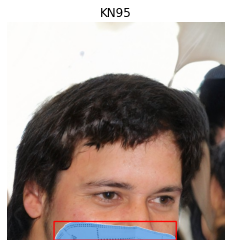

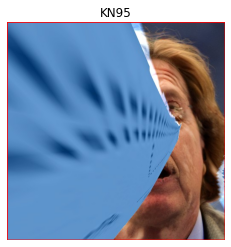

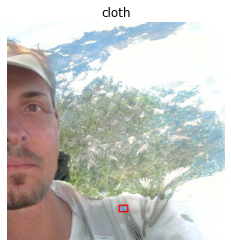

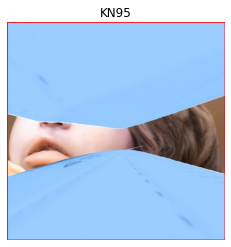

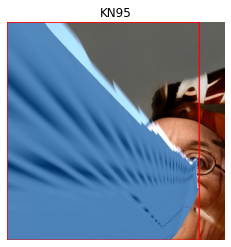

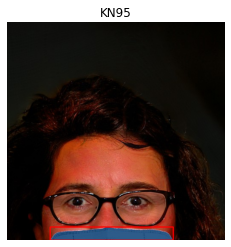

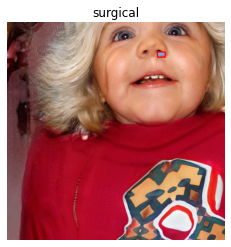

In [6]:
widths = np.zeros(train_df.shape[0])
heights = np.zeros(train_df.shape[0])
for idx, row in train_df.iterrows():
    bbox = eval(row["bbox"])
    w = bbox[3]-bbox[1]
    h = bbox[2]-bbox[0]
    if w > 500 or h > 500:
        visualize(row, "data/train/")
    elif w < 50 or h < 50:
        visualize(row, "data/train/")
    heights[idx] = w
    widths[idx] = h
    

In [7]:
np.max(heights), np.max(widths)

(512.0, 512.0)

In [8]:
np.min(heights), np.min(widths)

(12.0, 18.0)

(array([1.800e+01, 1.420e+02, 6.640e+02, 3.275e+03, 1.405e+03, 9.000e+01,
        2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00]),
 array([ 12.,  62., 112., 162., 212., 262., 312., 362., 412., 462., 512.]),
 <BarContainer object of 10 artists>)

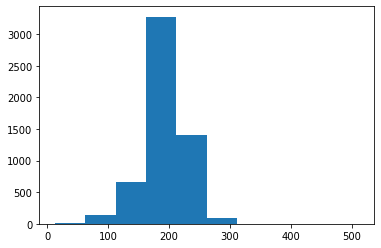

In [9]:
plt.hist(heights)

(array([5.000e+00, 3.000e+00, 1.080e+02, 1.007e+03, 2.081e+03, 2.139e+03,
        2.470e+02, 4.000e+00, 4.000e+00, 2.000e+00]),
 array([ 18. ,  67.4, 116.8, 166.2, 215.6, 265. , 314.4, 363.8, 413.2,
        462.6, 512. ]),
 <BarContainer object of 10 artists>)

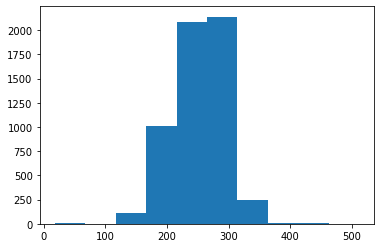

In [10]:
plt.hist(widths)

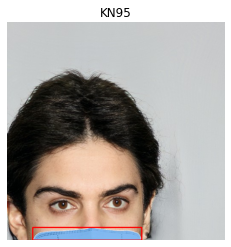

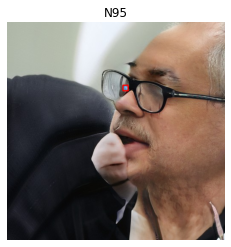

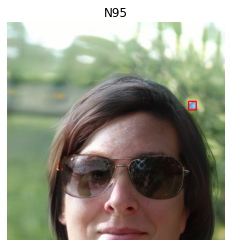

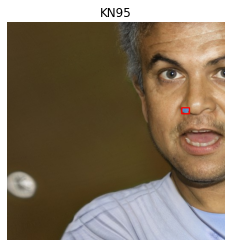

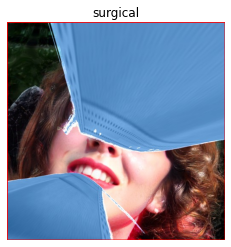

In [11]:
widths = np.zeros(val_df.shape[0])
heights = np.zeros(val_df.shape[0])
for idx, row in val_df.iterrows():
    bbox = eval(row["bbox"])
    w = bbox[3]-bbox[1]
    h = bbox[2]-bbox[0]
    if w > 500 or h>500:
        visualize(row, "data/val/")
    elif w < 50 or h < 50:
        visualize(row, "data/val/")
    heights[idx] = w
    widths[idx] = h
    

In [12]:
np.max(heights), np.max(widths)

(512.0, 512.0)

In [13]:
np.min(heights), np.min(widths)

(13.0, 12.0)

(array([7.00e+00, 5.50e+01, 2.69e+02, 1.47e+03, 5.60e+02, 3.60e+01,
        2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([ 13. ,  62.9, 112.8, 162.7, 212.6, 262.5, 312.4, 362.3, 412.2,
        462.1, 512. ]),
 <BarContainer object of 10 artists>)

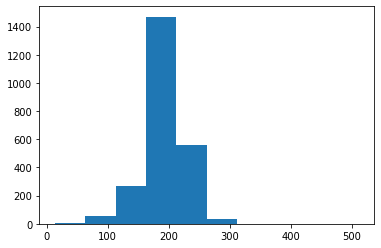

In [14]:
plt.hist(heights)

(array([  3.,   0.,  39., 391., 852., 981., 132.,   1.,   0.,   1.]),
 array([ 12.,  62., 112., 162., 212., 262., 312., 362., 412., 462., 512.]),
 <BarContainer object of 10 artists>)

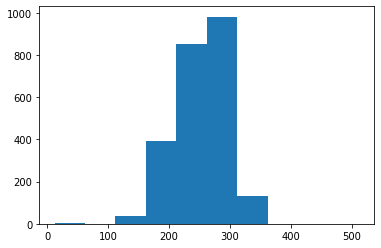

In [15]:
plt.hist(widths)